In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

from statsmodels.distributions.empirical_distribution import ECDF

matplotlib.style.use('ggplot')

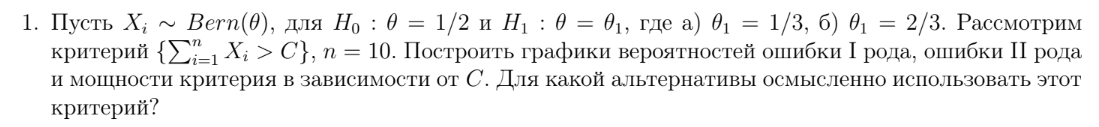

In [20]:
def criteria(sample, c):
    return int(np.sum(sample) > c)

# sum(X_{i}) ~ Binom(n, p)

def type_one(sample, n, c, t):
    ans = 0
    for i in range(int(c) + 1, n+1):
        ans += sc.stats.binom.pmf(i, n, t)
    return ans
    
def type_two(sample, n, c, t1):
    ans = 0
    for i in range(int(c)+1):
        ans += sc.stats.binom.pmf(i, n, t1)
    return ans

def error_plot(sample, n, C, t, t1):
    coor_y = [type_one(sample, n, c, t) for c in C]
    plt.plot(C, coor_y, label="I")
    coor_y = [type_two(sample, n, c, t1) for c in C]
    plt.plot(C, coor_y, label="II")
    
    coor_y = np.array(coor_y)
    coor_y *= -1
    coor_y += 1
    plt.plot(C, coor_y, label="Мощность")
    
    plt.legend(loc='best')

n = 10
t = 1/2
C = np.arange(0, n, 0.01)
sample = np.random.binomial(1, 1/2, size=n)

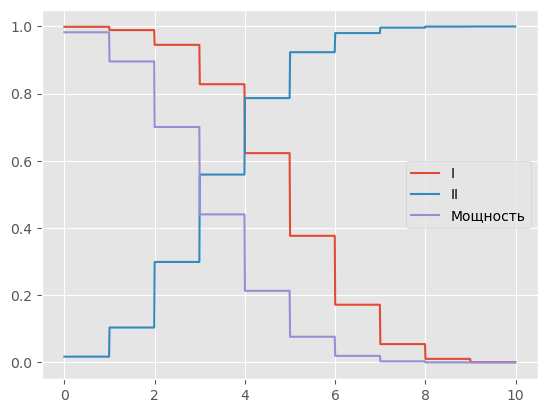

In [21]:
#a)
t1 = 1/3
error_plot(sample, n, C, t, t1)

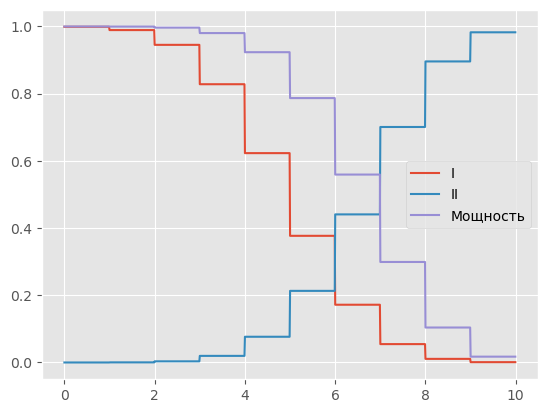

In [22]:
#b)
t1 = 2/3
error_plot(sample, n, C, t, t1)

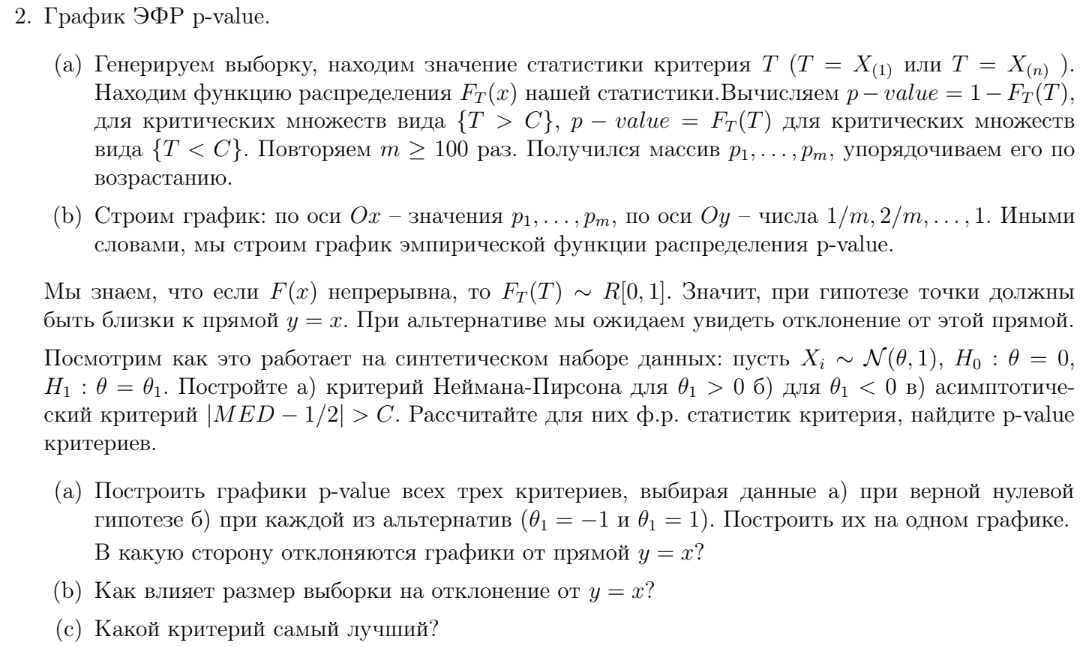

In [15]:
#a) b)
def criteria(t1, alpha, sample):
    # sum(X_{i}) > C 
    # ~ N(t, n)
    n = len(sample)
    if t1 > 0:
        C = n**0.5 * sc.stats.norm.ppf(1-alpha)
        ans = bool(np.sum(sample) > C)
    #sum(X_{i}) < C
    else:
        C = n**0.5 * sc.stats.norm.ppf(alpha)
        ans = bool(np.sum(sample) < C)
    return ans

#c)
def as_criteria(alpha, sample):
    n = len(sample)
    C = 1/(n**0.5) * sc.stats.norm.ppf(1-alpha/2, 0, (np.pi/2)**0.5)
    ans = (abs(np.median(sample)) > abs(C))
    return ans


#p-values
def pvalue_criteria(t1, sample):
    ans = sc.stats.norm.cdf(
        np.sum(sample), 0, (len(sample)**0.5))
    if t1 > 0:
        return 1 - ans
    else:
        return ans

    
def pvalue_as(sample):
    n = len(sample)
    return (1 - sc.stats.norm.cdf(abs(np.median(sample)), 0, (np.pi/2/n)**0.5) 
            + sc.stats.norm.cdf(-abs(np.median(sample)), 0, (np.pi/2/n)**0.5))
          

Значение параметра:  -1
Число серий:  100


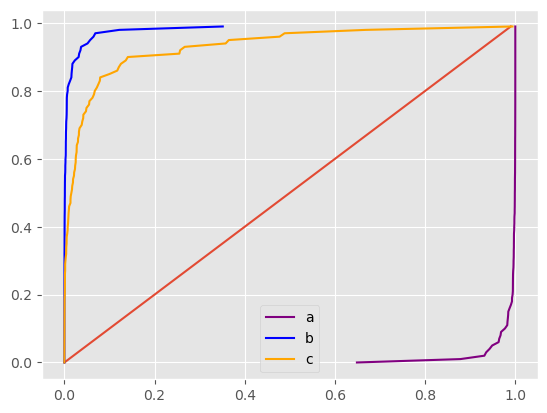

In [17]:
t = float(input("Значение параметра: "))
m = int(input("Число серий: "))
a = []
b = []
c = []

for i in range(m):
    sample = sc.stats.norm.rvs(t, 1, size=10)
    a.append(pvalue_criteria(1, sample))
    b.append(pvalue_criteria(-1, sample))
    c.append(pvalue_as(sample))

a.sort()
b.sort()
c.sort()

plt.plot([i/m for i in range(m)], [i/m for i in range(m)])
plt.plot(a, [i/m for i in range(m)],color='purple', label='a')
plt.plot(b, [i/m for i in range(m)], color='blue', label='b')
plt.plot(c, [i/m for i in range(m)], color='orange', label='c')
plt.legend(loc='best')

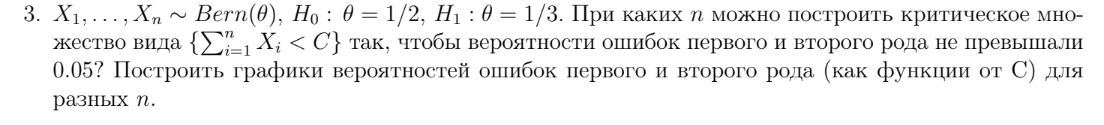

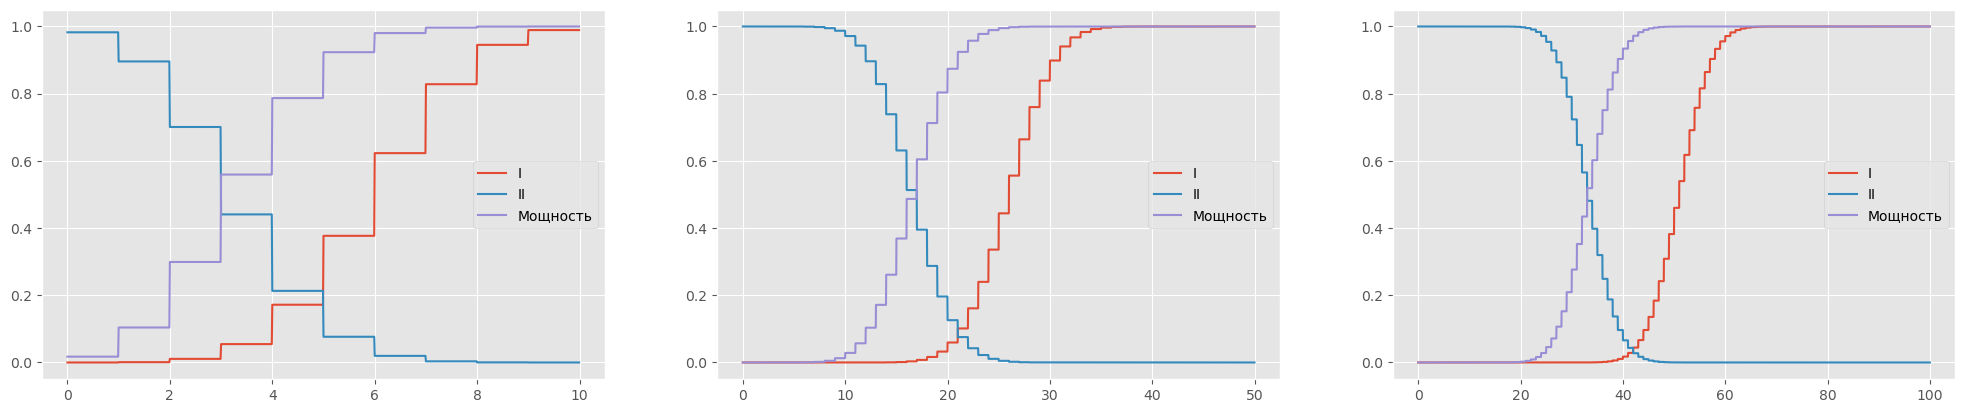

In [6]:
def criteria(sample, c):
    return int(np.sum(sample) < c)

# sum(X_{i}) ~ Binom(n, p)

def type_one(sample, n, c, t):
    ans = 0
    for i in range(int(c)):
        ans += sc.stats.binom.pmf(i, n, t)
    return ans
    
def type_two(sample, n, c, t1):
    ans = 0
    for i in range(int(c)+1, n+1):
        ans += sc.stats.binom.pmf(i, n, t1)
    return ans

def error_plot(sample, n, C, t, t1):
    coor_y = [type_one(sample, n, c, t) for c in C]
    plt.plot(C, coor_y, label="I")
    coor_y = [type_two(sample, n, c, t1) for c in C]
    plt.plot(C, coor_y, label="II")
    
    coor_y = np.array(coor_y)
    coor_y *= -1
    coor_y += 1
    plt.plot(C, coor_y, label="Мощность")
    
    plt.legend(loc='best')

        
plt.subplots_adjust(left=0.01, right=3)
N = [10, 50, 100]
t = 1/2
plt_num = 1

for n in N:
    plt.subplot(1, 3, plt_num)
    plt_num += 1
    
    C = np.arange(0, n, 0.01)
    sample = np.random.binomial(1, 1/2, size=n)
    error_plot(sample, n, C, t, 1/3)